# 002 Optimization with Linear Algebra

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from IPython import display

Now, let's take a look at how linear algebra can help us in optimization!

Let's again start with an example which is defined by a linear system of equations.

I want to know the masses of three very light objects. These objects are so light (<1g), that one object is not going to work with our scale that we have, which only starts to measure objects from >1g.

So, we simply put on multiple objects. Doing this, we get, for example:

$$
\begin{array}{cc}
o_1&+o_2& &=1.8\\
   & o_2&+o_3 &=1.3\\
o_1&    &+o_3 &=1.4\\
\end{array}
$$

Now we have three equations for three unknowns, the columns are all independent, so we can invert the matrix, and our solution becomes:

In [5]:
A=np.array([[1,1,0],[0,1,1],[1,0,1]])
b=np.array([1.8,1.3,1.4])
masses = ...
print('Solution for the masses is',masses)
print('Sanity check of A*masses yields',...)

Solution for the masses is Ellipsis
Sanity check of A*masses yields Ellipsis


But our scale is not very good, so each of the measurements may have a slight error. So we decide to measure one more combination with all objects:

$$
\begin{array}{cc}
o_1&+o_2& &=1.8\\
   & o_2&+o_3 &=1.3\\
o_1&    &+o_3 &=1.4\\
o_1&+o_2&+o_3 &=2.2\\
\end{array}
$$

But now we have four equations for three unknowns, so we have more information than we need. We still would like to find some sort of solution, however.

### More Rows than Columns

This is the $ n \times k $ case with $ n > k $ and is extremely important in lots of applications, including **linear regression** (where $ n $ is the number of inputs, and $ k $ is the number of model variables).

Given arbitrary $\vec{y} \in \mathbb R ^n $, we seek an $ \vec{x} \in \mathbb R ^k $ such that $ \vec{y} = A\vec{x} $

Let's assume that the columns of $ A $ are linearly independent, which means that the span of $ A $ is a $ k $-dimensional subspace of $ \mathbb R ^n $. Given that this is a subspace, it is highly improbable that this subspace can contain a random vector $ \vec{y} \in \mathbb R ^n $.

Imagine the two-dimensional subspace of $\mathbb R^3$, so $ k=2 $ and $ n=3 $. Now, let's pick a random point (vector) in $\vec{y}=\mathbb R^3$ - in essence, we're asking now: what is the probability that $\vec{y}$ is exactly on the plane?

This probability is intuitively very low, since the plane is infinitesimally thin. So, the chances for a random $\vec{y}$ to be part of the subspace are vanishingly low.

Therefore, if $ n > k $, we usually do not assume a unique solution.

The key idea, however, is that we can still look for an **approximate solution**, for example, by saying that we would like to find the point $\vec{x}$ in the plane-subspace that is **closest** to $\vec{y}$, or in other words:

<div class="alert alert-warning">
<p>Look for $ \vec{x} $, such that $ \| \vec{y} - A\vec{x}\| $ ....
</div>

Let's solve this first using calculus:

### $\underset{\vec{x}}{\arg\min}{\| \vec{y} - A\vec{x}\|}$ using calculus

Let's start. We need to find the **vector**-derivative of our expression and set it to zero:


$$
\| \vec{y} - A\vec{x}\|^2 =\min\rightarrow\frac{d}{d\vec{x}}\| \vec{y} - A\vec{x}\|=0
$$

where

$$
\frac{d}{d\vec{x}}:=\left (\begin{matrix}\frac{d}{dx_1}\\\frac{d}{dx_2}\\\vdots\\\frac{d}{dx_n}\end{matrix}\right )
$$

$$
\begin{array}{ll}
&\frac{d}{d\vec{x}}(\vec{y} - A\vec{x})^{\top}\cdot(\vec{y} - A\vec{x})
\\
=&\frac{d}{d\vec{x}}(\|\vec{y}\|^2 - \vec{y}^{\top}\cdot A\vec{x}-\vec{x}^{\top}A^{\top}\cdot\vec{y}+\vec{x}^{\top}A^{\top}A\vec{x})
\\
=&\frac{d}{d\vec{x}}(\|\vec{y}\|^2-2\vec{x}^{\top}A^{\top}\cdot\vec{y}+\vec{x}^{\top}A^{\top}A\vec{x})
\end{array}
$$

Hmm, but we do not know yet how to take vector derivatives. So let's take a $2\times 3$-example, and multiply the term after the derivative explicitly:

$$
(-2(x_1,x_2)\left (\begin{matrix}a_{11}&a_{21}&a_{31}\\a_{12}&a_{22}&a_{32}\end{matrix}\right ) \left (\begin{matrix}y_1\\y_2\\y_3\end{matrix}\right )+\\(x_1,x_2)\left  (\begin{matrix}a'_{11}&a'_{12}\\a'_{21}&a'_{22}\end{matrix}\right ) \left ( \begin{matrix}x_1\\x_2\end{matrix}\right ) )
$$

$$
=(-2(x_1,x_2)\left (\begin{matrix}y'_1\\y'_2\end{matrix}\right )+(x_1,x_2)\left  (\begin{matrix}a'_{11}x_1+a'_{12}x_2\\a'_{21}x_1+a'_{22}x_2\end{matrix}\right ) )
$$

$$
=(-2x_1 y'_1-2x_2 y'_2+(x_1 a'_{11}x_1+x_1 a'_{12}x_2+x_2 a'_{21}x_1+x_2 a'_{22}x_2))
$$

So, now we take the derivatives to the two variables:

$$
\frac{d}{dx_1}=(-2y'_1+(2x_1 a'_{11}+a'_{12}x_2+x_2 a'_{21}))
$$

realizing that $A^{\top}A$ is a **symmetric** matrix by definition, so that $a'_{12}=a'_{21}$, we have

$$
=(-2y'_1+(2x_1 a'_{11}+2x_2 a'_{12}))
$$

and, similarly:

$$
\frac{d}{dx_2}=(-2y'_2+(2x_1 a'_{12}x_1+2x_2 a'_{22}))
$$

and collecting terms into a vector:

$$
\frac{d}{d\vec{x}}:=\left (\begin{matrix}\frac{d}{dx_1}\\\frac{d}{dx_2}\end{matrix}\right )=
...
$$

So, we can see that vector derivatives cancel out the $\vec{x}^{\top}$ in the expression, so to speak.

$$
\frac{d}{d\vec{x}}=0\rightarrow
-2A^{\top}\vec{y}+2A^{\top}A\vec{x}=0
$$


$$
\rightarrow A^{\top}\vec{y}=A^{\top}A\vec{x}
$$

Given the existence of $(A^{\top}A)^{-1}$, we multiply with this inverse from the left-hand side and obtain:

<div class="alert alert-warning">
<p>$$
\vec{x}=...
$$
</div>

as our solution.


Now, we are not done yet, as we still have to prove that this extremum is actually a **minimum**. For this, we need to collect the **Hessian** matrix of our problem and prove that it is positive definite. For now, we will table this and hope for the best (spoiler: yes, it is).

More rules on how to differentiate with respect to vectors are given below.


#### Example ctd.

Let's return to our example with the three objects that were measured four times. The resulting matrix is:

In [4]:
A=np.array([[1,1,0],[0,1,1],[1,0,1],[1,1,1]])
b=np.array([1.8,1.3,1.4,2.2])
x=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A)),b)
errors = np.matmul(A,x)-b
residual=np.sum(np.matmul(errors,np.transpose(errors)))
print('least squares solution is',x,'with residual',residual)

least squares solution is [0.94285714 0.84285714 0.44285714] with residual 0.0014285714285714184


And we can see that our fourth measurement has slightly changed all previous measurements a bit.

We also can see that our solution is not "perfect", as it does not explain the full situation and we get a residual.

### Numerical stability
As an additional comment, it turns out that calculating inverses like this is not very stable. Rather, people have developed better algorithms based on orthogonal transformations that work in a similar fashion to Gaussian Elimination in order to reduce the system of equations to a solvable form.

Since orthogonal transformations are important in general, however, let me quickly introduce them here.

### Orthogonal transformations

An orthogonal transformation $M$ is one for which:

$$M^{\top}=M^{-1}$$

Or in other words, the inverse of $M$ is simply its transpose.

Why are these transformations special? Well, they keep the length of a vector unchanged!!

To see why this is so, consider a vector $\vec{x}$, which has length $\|\vec{x}\|^2=<\vec{x}^{\top},\vec{x}>$.

The transformed vector $M\vec{x}$ has length

$$
\|M\vec{x}\|^2=<\vec{x}^{\top}M^{\top},M\vec{x}>=\vec{x}^{\top}M^{\top}M\vec{x}
$$
$$=\vec{x}^{\top}M^{-1}M\vec{x}=\vec{x}^{\top}I\vec{x}=\vec{x}^{\top}\vec{x}=\|\vec{x}\|^2
$$

Famous examples of orthogonal transformations include:

1. $M=I$ trivial to see
2. $M=\left( \begin{matrix}\cos{\theta}&-\sin{\theta}\\\sin{\theta}&\cos{\theta}\end{matrix}\right )$. This is the rotation matrix, which from intuition alone should tell you that it doesn't change the length of something

Now, these transformations are used in the application where we have more rows than columns - for those interested, the name of this technique relies on <a href="https://en.wikipedia.org/wiki/Householder_transformation">Householder Transformations</a>.

### $\underset{\vec{x}}{\arg\min}{\| \vec{y} - A\vec{x}\|}$ using projections

Let $S$ be a linear subspace of $\mathbb{R}^n$ and let $\vec{y}\in\mathbb{R}^n$

Given that the columns of $n\times k$ matrix $X$ form a basis of $S$. Then, we can construct $P=X(X^{\top}X)^{−1}X^{\top}$ as a projection matrix that takes elements of $\mathbb{R}^n$ and projects them into $S$.

So, we need to show that given an arbitrary $\vec{y}\in\mathbb{R}^n$ and $P=X(X^{\top}X)^{−1}X^{\top}$

1. $P\vec{y}\in S$: $P\vec{y}=(X(X^{\top}X)^{−1}X^{\top})\vec{y}=X\vec{a}$ with $\vec{a}:=(X^{\top}X)^{−1}X^{\top}y$. Given that we said that the columns of $X$ spans $S$, we see that $X\vec{a}\in S$, and so we are done.
2. $\vec{y}−P\vec{y}\perp S$, or, equivalently:
$\vec{y}−(X(X^{\top}X)^{−1}X^{\top})\vec{y}\perp X\vec{b}$ $\forall\vec{b}\in\mathbb{R}^k$. So, let's do the inner product: $(X\vec{b})^{\top}(\vec{y}−(X(X^{\top}X)^{−1}X^{\top})\vec{y})$
$=\vec{b}^{\top}(X^{\top}\vec{y}-X^{\top}X(X^{\top}X)^{-1}X^{\top}\vec{y})$
$=\vec{b}^{\top}(X^{\top}\vec{y}-X^{\top}\vec{y})=0$

#### Example

Let's project stuff onto a plane going through the origin in $\mathbb{R}^3$ and spanned by the two vectors $\vec{x}_1=\left (\begin{matrix}1\\1\\1\end{matrix}\right )$ and $\vec{x}_2=\left (\begin{matrix}-1\\1\\0\end{matrix}\right )$.

It's easy to see that $<\vec{x}_1,\vec{x}_2>=0$ and hence they are orthogonal, which means that we have a subspace of Span 2.

Now, our projection matrix of the full space onto this becomes:

$P=X(X^{\top}X)^{−1}X^{\top}$ with $X=\left (\begin{matrix}1&-1\\1&1\\1&0\end{matrix}\right )$



In [6]:
X=np.array([[1,-1],[1,1],[1,0]]);
Xt = np.transpose(X)
P=np.matmul(np.matmul(X,np.linalg.inv(np.matmul(Xt,X))),Xt)
print(P)

[[ 0.83333333 -0.16666667  0.33333333]
 [-0.16666667  0.83333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]]


Let's plot the plane and a point in $\mathbb{R}^3$, as well as its projection onto the plane:

In [17]:
%plot native
[x,y]=np.meshgrid([-3:6:3]);
surf(x,y,0.5*x+0.5*y,'FaceAlpha',0.5); hold on
quiver3(0,0,0,1,1,1,'LineWidth',2,'Color','k')
quiver3(0,0,0,-1,1,0,'LineWidth',2,'Color','k')
v = [1;1;2.5];
plot3(v(1),v(2),v(3),'ko')
pv = P*v;
plot3(pv(1),pv(2),pv(3),'kx')
plot3([pv(1) v(1)],[pv(2) v(2)],[pv(3) v(3)],'k--')
axis equal
view(17,4)

SyntaxError: ignored

#### Proof continued

We want to show that
$\vec{x}^*=(A^{\top}A)^{−1}A^{\top}\vec{y}$ is a minimal solution for the overdetermined system $A\vec{x}=\vec{y}$.

Note that

$A\vec{x}^*=A(A^{\top}A)^{−1}A^{\top}\vec{y}=P\vec{y}$, which means that this is the orthogonal projection of our input vector $\vec{y}$ onto the span of $A$.

Because it's orthogonal, it means that:

$\|\vec{y}-P\vec{y}\|\leq\|\vec{y}-\vec{z}\|$ for any $\vec{z}\in\text{span}(A)$

But, because $A\vec{x}\in\text{span}(A)$, it means that

$\|\vec{y}-A\vec{x}^*\|\leq\|\vec{y}-A\vec{x}\|$, and hence it is optimal for arbitrary choice of $\vec{x}$.

## Example - Polynomial fitting

So, how do we apply this knowledge now to real-world problems?

Let's say we want to fit a polynomial to data - in general, a polynomial is a **linear** function in its coefficients $a_i$ like so:

$$
p_a(x):=\sum_i^n a_i x^i
$$

So, if we are given $k>>n$ tuples of input and output data $x_i,y_i$ and we want to fit a polynomial of known degree $n$ to it in the least squares sense, we have to minimize:

$$
\underset{\vec{a}}{\arg\min}{\| \vec{y} - A(\vec{x})\vec{a}\|}
$$

where the matrix $A(\vec{x})$ encodes the input data and $\vec{a}$ is the vector of polynomial coefficients we want to look for.

So what does the matrix $A$ look like?

At each input, output pair $x_i,y_i$, we get the following equation:

$$
a_0+a_1 x_{i} + a_2 x_{i}^2 + ... + a_n x_{i}^n = y_i
$$

so $A \in \mathbb{R}^{k\times n}$:

$$
\left (
\begin{matrix}
1 &  x_{1} &  x_{1}^2 & ... &  x_{1}^n\\
1 &  x_{2} &  x_{2}^2 & ... &  x_{2}^n\\
\vdots &\vdots & \vdots& \vdots & \vdots\\
1 &  x_{k} &  x_{k}^2 & ... &  x_{k}^n\\
\end{matrix}
\right )
$$

This matrix with increasing powers of $x_i$ is called the **Vandermonde** matrix.

To fit the polynomial, we simply do:

$\vec{a}=(A^{\top}A)^{-1}A^{\top}\vec{y}$

and we're done!

Let's try it with some linear data


In [16]:
print(y[:,1])

[3.7 5.4 5.6 7.  7.6 7.9 9.5]


Solution according to least squares algorithms [2.90464889 1.08956437]
Solution according to matrix manipulation [2.90464889 1.08956437]


<ipython-input-13-9f65bd362666>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff=np.linalg.lstsq(A,b)


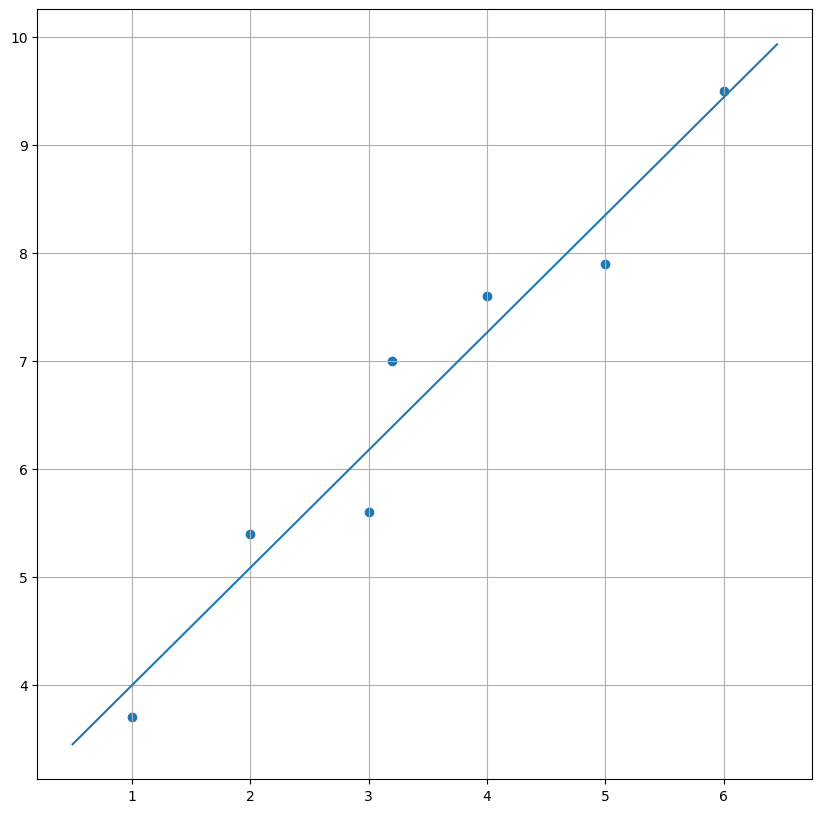

In [13]:
# make data
y = np.array([[1,3.7],[2,5.4],[3,5.6],[3.2,7.0],[4,7.6],[5,7.9],[6,9.5]])

# scatter the data
plt.figure(figsize=(10,10))
plt.scatter(y[:,0],y[:,1])
plt.grid()

# create the Vandermonde matrix with 1 x_i for linear polynomial
A=np.stack((np.ones_like(y[:,0]),y[:,0]),axis=1)

# define y_i
b = y[:,1]

# solve with numpy least squares algorithm (numerically MUCH more stable!)
coeff=np.linalg.lstsq(A,b)
print('Solution according to least squares algorithms',coeff[0])

# solve with transpose (yes, that will be the same ^^)
coeff=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A)),b)
print('Solution according to matrix manipulation',coeff)

# plot best fitting line
xplot = np.arange(0.5,6.5,0.05)
plt.plot(xplot,coeff[0]+coeff[1]*xplot)

Let's fit the same data with polynomials of degrees 2-4:

[[1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [1.  3.2]
 [1.  4. ]
 [1.  5. ]
 [1.  6. ]] [3.7 5.4 5.6 7.  7.6 7.9 9.5]
Solution according to least squares algorithms [2.90464889 1.08956437]
Error 1.0988955916994274
[[ 1.    1.    1.  ]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    4.   16.  ]
 [ 1.    5.   25.  ]
 [ 1.    6.   36.  ]] [3.7 5.4 5.6 7.  7.6 7.9 9.5]
Solution according to least squares algorithms [ 2.5046759   1.37461712 -0.04048267]
Error 1.0654639153957701
[[  1.      1.      1.      1.   ]
 [  1.      2.      4.      8.   ]
 [  1.      3.      9.     27.   ]
 [  1.      3.2    10.24   32.768]
 [  1.      4.     16.     64.   ]
 [  1.      5.     25.    125.   ]
 [  1.      6.     36.    216.   ]] [3.7 5.4 5.6 7.  7.6 7.9 9.5]
Solution according to least squares algorithms [ 1.44122878  2.71657331 -0.4893348   0.04308138]
Error 1.0059716029390957
[[1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8

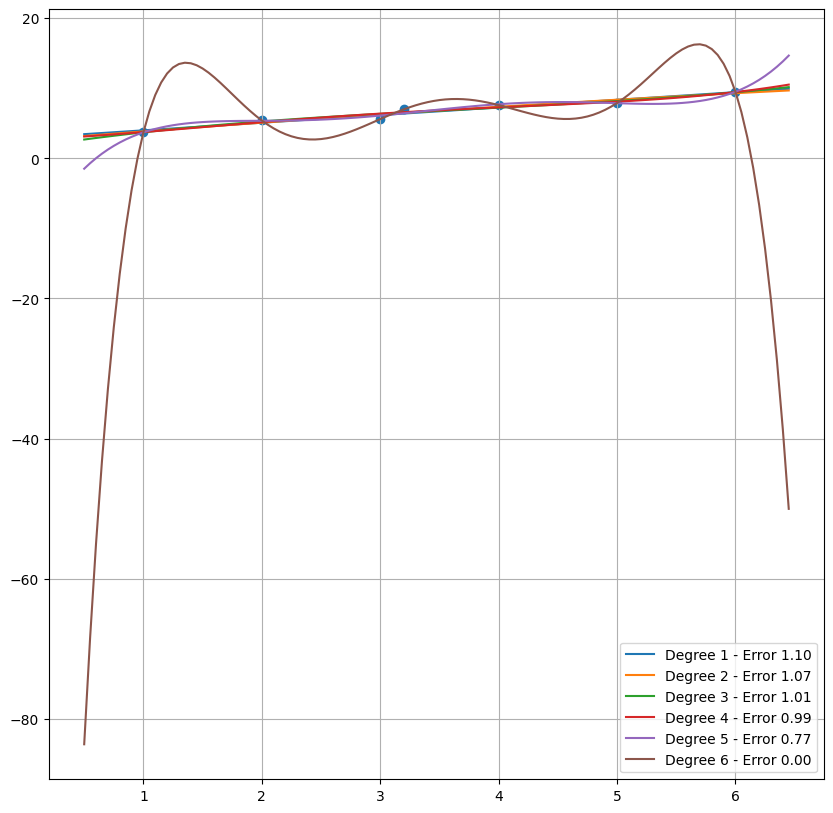

In [26]:
# scatter the data
plt.figure(figsize=(10,10))
plt.scatter(y[:,0],y[:,1])
plt.grid()

for n in np.arange(1,7):
    # create the Vandermonde matrix for quadratic polynomial
    # sooo many Python hacks for array broadcasting here:
    # https://stackoverflow.com/questions/66242475/how-to-raise-every-element-of-a-vector-to-the-power-of-every-element-of-another
    A=y[:,0,None]**np.arange(0,n+1) # code


    # define y_i
    b = y[:,1]

    print(A,b)

    # solve with backslash (numerically MUCH more stable!)
    coeff=np.linalg.lstsq(A,b,rcond=None)[0]
    print('Solution according to least squares algorithms',coeff)


    # y-values for plotting points
    xplott=np.transpose(xplot)
    yplot = np.matmul(xplott[:,None]**np.arange(0,n+1),coeff);

    # error
    err=np.linalg.norm(np.matmul(A,coeff)-b);
    print('Error',err)
    plt.plot(xplot,yplot,label='Degree {:d} - Error {:.2f}'.format(n,err))
    plt.legend()

So, which fit is better? Obviously, we can see that the error reduces for each higher degree. In fact, we know that when $k==n$, we will have $n$ unknowns for $n$ equations and we will therefore be able to find a unique solution to fitting the polynomial with **zero error**.

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.20000000e+00 1.02400000e+01 3.27680000e+01
  1.04857600e+02 3.35544320e+02 1.07374182e+03 3.43597384e+03]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03 1.63840000e+04]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04 7.81250000e+04]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05]] [3.7 5.4 5.6 7.  7.6 7.9 9.5]
Solution according to least squares algorithms [-8.48748383e+01  1.15227098e+02  4.46164694e+0

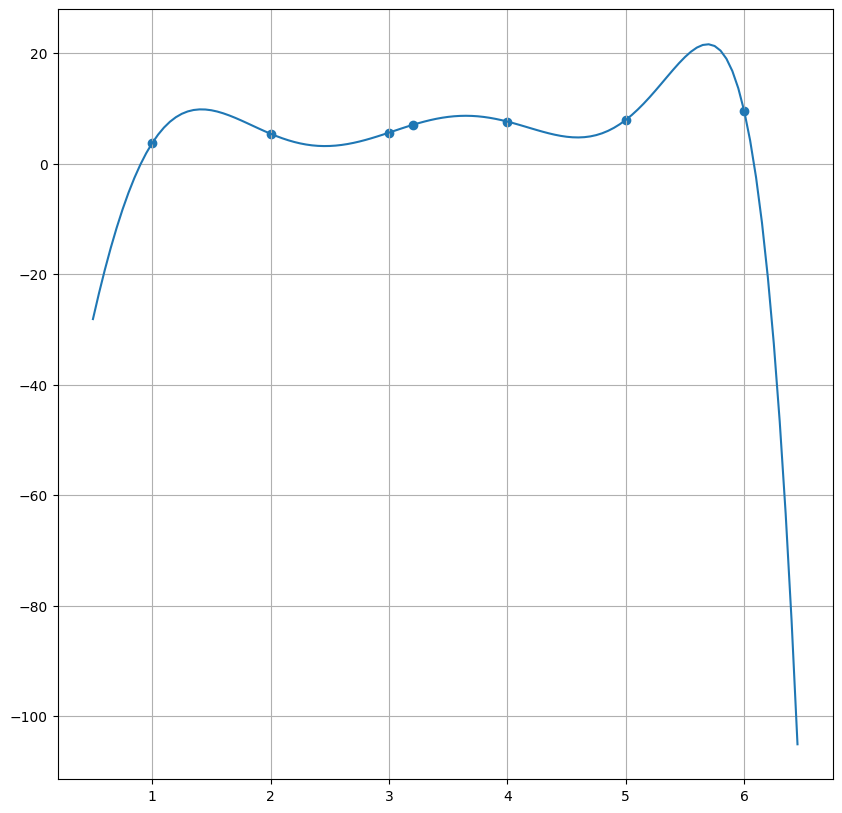

In [25]:
# scatter the data
plt.figure(figsize=(10,10))
plt.scatter(y[:,0],y[:,1])
plt.grid()

n = len(y[:,0])
# create the Vandermonde matrix for quadratic polynomial
# sooo many Python hacks for array broadcasting here:
# https://stackoverflow.com/questions/66242475/how-to-raise-every-element-of-a-vector-to-the-power-of-every-element-of-another
A=y[:, 0, None]**np.arange(0,n+1)


# define y_i
b = y[:,1]

print(A,b)

# solve with backslash (numerically MUCH more stable!)
coeff=np.linalg.lstsq(A,b,rcond=None)[0]
print('Solution according to least squares algorithms',coeff)


# y-values for plotting points
xplott=np.transpose(xplot)
yplot = np.matmul(xplott[:,None]**np.arange(0,n+1),coeff);

# error
err=np.linalg.norm(np.matmul(A,coeff)-b);
print('Error',err)
plt.plot(xplot,yplot)

## KISS : Keep It Simple and Stupid
## Occam's razor / elbow \__

Erg. But that polynomial fluctuates quite crazily. This brings us to a very important point:


If we believe that our data was completely fine and we have zero noise and there are no additional points to be measured in between or outside the given points, then we are fine.

However, we seemed quite happy initially to claim that our data was simply following a **linear** trend - this is because we assumed (intuitively) that the data was sampled from an underlying model. In essence, what we are trying to do with the fitting is to use the **limited** samples to **guess the underlying model**.

## More Columns than Rows

Let's talk briefly about another case of solving systems of equations. Let's say we have $ n \times k $ case with $ n < k $, and so we have fewer equations than unknowns. Our system is **underdetermined**.

Intuitively it should be clear that in this case there are either no solutions or infinitely many — in other words, we can have no unique solution.

When $ k=3 $ and $ n=2 $, the columns of $ A $ consist of 3 vectors in $ \mathbb R ^2 $, and this set cannot be linearly independent, since only two vectors are enough to span $ \mathbb R ^2 $ and therefore a third column is a linear combination of the other two.

## Differentiating vectors

The following relationships are useful in many applications and tell you how to differentiate expressions with respect to vectors and even matrices (i.e., linear transformations).  

We define the following quantities:

- $ \vec{z}, \vec{x} $ and $ \vec{a} $ all be $ n \times 1 $ vectors  
- $ A $ be an $ n  \times n $ matrix  
- $ B $ be an $ m \times n $ matrix and $ \vec{y} $ be an $ m  \times 1 $ vector  


Then

1. $ \frac{\partial \vec{a}^{\top} \vec{x}}{\partial \vec{x}} = a $  
1. $ \frac{\partial A \vec{x}}{\partial \vec{x}} = A^{\top} $  
1. $ \frac{\partial \vec{x}^{\top} A\vec{x}}{\partial \vec{x}} = (A + A^{\top}) \vec{x} $, if $A$ symmetric, this reduces to  $2A\vec{x} $
1. $ \frac{\partial \vec{y}^{\top}B \vec{z}}{\partial \vec{y}} = B \vec{z} $  
1. $ \frac{\partial \vec{y}^{\top}B \vec{z}}{\partial B} = \vec{y} \vec{z}^{\top} $  